In [58]:
import pandas as  pd
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()

In [60]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

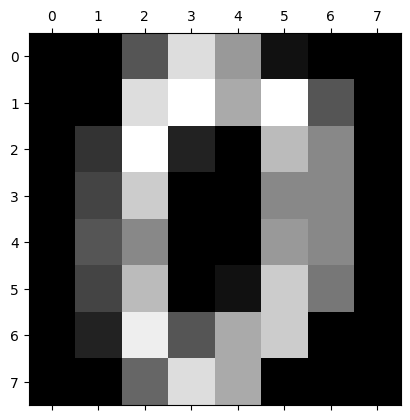

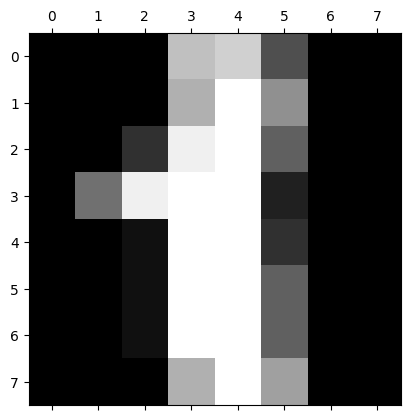

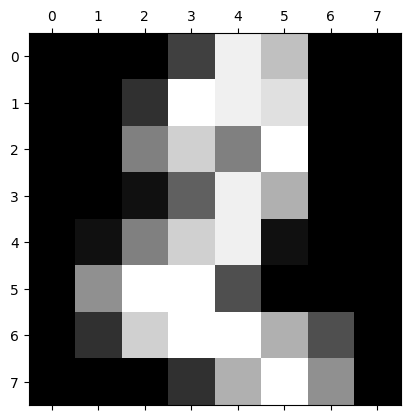

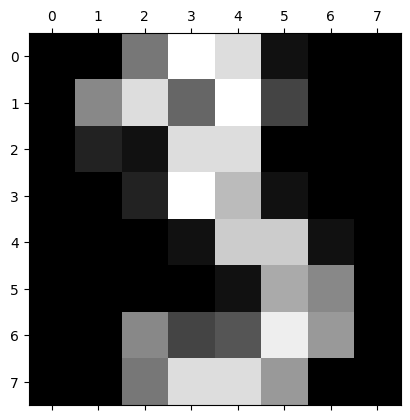

In [61]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [62]:
df= pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [63]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [64]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
df.drop(['target'],axis=1)
y=digits.target

In [67]:
X_train , X_test,y_train ,y_test = train_test_split(df.drop(['target'],axis=1) , digits.target , test_size=0.2)

In [68]:
len(X_train) 

1437

In [69]:
len(X_test)

360

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [71]:
model.fit(X_train , y_train)

RandomForestClassifier()

In [72]:
model.score(X_test ,y_test)

0.9694444444444444

In [73]:
y_predicted = model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm= confusion_matrix(y_test , y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 42,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 35]], dtype=int64)

In [76]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'truth')

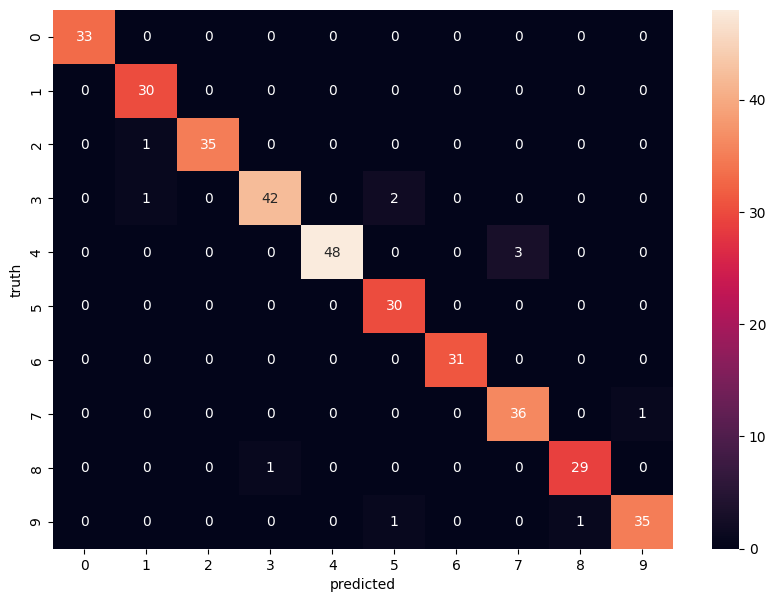

In [77]:
plt.figure(figsize=(10,7))
sn.heatmap(cm ,  annot=True)
plt.xlabel('predicted')
plt.ylabel("truth")

In [81]:
#T

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(RandomForestClassifier(n_estimators=40) , digits.data , digits.target)

array([0.93055556, 0.89722222, 0.95543175, 0.95821727, 0.91922006])